# 소득 예측 AI 해커톤
- `알고리즘`, `정형`, `회귀`, `사회`, `RMSE`
- 기간
    - 2024.03.11 ~ 2024.04.08 09:59
- https://dacon.io/competitions/official/236230/data

## 배경

> 안녕하세요!
>
> 해커톤 41회, 소득 예측 AI 해커톤에 오신 것을 환영합니다.  
> 
> 이번 데이콘 해커톤은 다양한 개인적 특성을 바탕으로 한 데이터를 활용하여 소득 수준을 예측하는 것을 목표로 합니다.
> 
> 참가자 여러분들은 제공된 개인 특성 데이터를 기반으로 한 알고리즘 개발을 통해 
> 
> 개인의 소득 수준을 예측함으로써 사회적 문제 해결에 기여할 수 있는 기회가 될 것입니다. 
> 
> 또한, 이번 대회의 목표는 단순히 개인 소득 수준을 예측하는 것을 넘어, 
> 
> 다양한 개인적 특성 데이터를 분석하고 이해하는 능력을 키우며,
> 
> 이를 통해 AI 역량과 경험을 한 단계 더 발전시키는 것입니다. 




## 주제
- 개인 특성 데이터를 활용하여 개인 소득 수준을 예측하는 AI 모델 개발

## 설명
- 개인의 특성과 관련된 다양한 데이터를 활용하여 개인 소득 수준을 예측할 수 있는 AI 모델 개발

### 컬럼 설명
- `train.csv`
    - 한 사람에 관련된 다양한 사회적, 경제적 정보
    - `ID`: 학습 데이터 고유 ID
    - `Age` : 나이
    - `Gender` : 성별
    - `Education_Status` : 교육 수준
    - `Employment_Status` : 고용 형태
    - `Working_Week (Yearly)` : 연간 근무하는 주
    - `Industry_Status` : 고용 분야
    - `Occupation_Status` : 직업 형태
    - `Race` : 인종
    - `Hispanic_Origin` : 히스패닉 혈통
    - `Martial_Status` : 결혼 유무
    - `Household_Status` : 가정 세대원 상태
    - `Household_Summary` : 가정 세대원 상태 요약
    - `Citizenship` : 시민권
    - `Birth_Country` : 출생국가
    - `Birth_Country (Father)`
    - `Birth_Country (Mother)`
    - `Tax_Status` : 세금 형태
    - `Gains` : 소득 금액
    - `Losses` : 손실 금액
    - `Dividends` : 배당 금액
    - `Income_Status` : 최종 소득 상태
    - `Income` : 예측 목표, 1시간 단위의 소득을 예측 (0일 경우 근로소득이 없다)
- `test.csv`
    - 한 사람에 관련된 다양한 사회적, 경제적 정보
    - `ID` : 테스트 데이터 고유 ID
    - Income이 존재하지 않음
- `sample_submission.csv`
    - `ID` : 테스트 데이터 고유 ID
    - `Income` : ID에 해당되는 Income을 예측하여 제출

# 데이터셋 전처리

In [85]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None) # 데이터프레임 모든 열 출력

from datetime import datetime
from datetime import timedelta
import missingno as msno

import warnings
warnings.filterwarnings(action='ignore')


In [86]:
train_path = "C:/Users/aryij/Documents/DataStudy/income-prediction-dacon/data/train.csv"
test_path = "C:/Users/aryij/Documents/DataStudy/income-prediction-dacon/data/test.csv"
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
train_df.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,Household_Status,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,Married,Householder,Householder,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,Separated,Nonfamily householder,Householder,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,Married,Householder,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,Divorced,Nonfamily householder,Householder,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,Divorced,Householder,Householder,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570


In [87]:
# train_df, test_df 합쳐서 하나로 total_df 생성
total_df = pd.concat([train_df, test_df])
total_df.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,Household_Status,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,Married,Householder,Householder,Native,US,US,US,Nonfiler,0,0,0,Unknown,425.0
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,Separated,Nonfamily householder,Householder,Native,US,US,US,Single,0,0,0,Under Median,0.0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,Married,Householder,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860.0
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,Divorced,Nonfamily householder,Householder,Native,US,US,US,Single,0,0,0,Under Median,850.0
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,Divorced,Householder,Householder,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570.0


In [88]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      30000 non-null  object 
 1   Age                     30000 non-null  int64  
 2   Gender                  30000 non-null  object 
 3   Education_Status        30000 non-null  object 
 4   Employment_Status       30000 non-null  object 
 5   Working_Week (Yearly)   30000 non-null  int64  
 6   Industry_Status         30000 non-null  object 
 7   Occupation_Status       30000 non-null  object 
 8   Race                    30000 non-null  object 
 9   Hispanic_Origin         30000 non-null  object 
 10  Martial_Status          30000 non-null  object 
 11  Household_Status        29999 non-null  object 
 12  Household_Summary       30000 non-null  object 
 13  Citizenship             30000 non-null  object 
 14  Birth_Country           30000 non-null  obje

In [89]:
# 결측치 확인 -> income (예측해야 하는 target) 빼고는 결측치 없음
total_df.isnull().sum()

ID                            0
Age                           0
Gender                        0
Education_Status              0
Employment_Status             0
Working_Week (Yearly)         0
Industry_Status               0
Occupation_Status             0
Race                          0
Hispanic_Origin               0
Martial_Status                0
Household_Status              1
Household_Summary             0
Citizenship                   0
Birth_Country                 0
Birth_Country (Father)        0
Birth_Country (Mother)        0
Tax_Status                    0
Gains                         0
Losses                        0
Dividends                     0
Income_Status                 0
Income                    10000
dtype: int64

## 중복 확인

In [90]:
# 중복 행 없음
total_df[total_df.duplicated()]

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,Household_Status,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income


## `describe()` 결과

### 수치형 변수
- `Working_Week (Yearly)` : 데이터의 50% 부터 최대치까지 전부 52주 근무
    - → 일반적으로 52주 근무 하는 사람들이 많다
- `Gains` : 75%까지 0인 것에 비해 평균 약 394, 최대치 99999, 표준편차 약 4264
    - → 소수의 인원이 높은 소득금액을 벌어 들인다
- `Losses` : 75%까지 0인 것에 비해 평균 약 40, 최대치 4356, 표준편차 275
    - → 극소수의 인원이 높은 손실 금액을 기록했다
- `Dividends` : 75%까지 0인 것에 비해 평균 약 129, 최대치 99999, 표준편차 약 1327
    - → 극소수의 인원이 높은 배당 금액 기록했다
- `Income` : 50%가 500, 평균 약 555, 중위값 근처에서 평균값이 형성됨
    - → 1시간 단위의 소득이 중위값 500을 조금 넘는 사람들이 많다

In [91]:
total_df.describe()

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,20000.000000
mean,35.736667,35.022633,394.979467,39.278000,129.001200,554.565250
std,17.979206,22.232172,4264.589678,275.037897,1327.460917,701.553155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,52.000000,0.000000,0.000000,0.000000,500.000000
75%,47.000000,52.000000,0.000000,0.000000,0.000000,875.000000
max,90.000000,52.000000,99999.000000,4356.000000,99999.000000,9999.000000


### 범주형 변수
- `Gender` : 여성이 15678, 남성이 14322 (약 52:48 비율)
- `Education_Status` : High graduate (고졸) 학력이 제일 많다
- `Employment_Status` : 아이 또는 군인이 가장 많다
- `Industry_Status` : 대학을 가지 않거나 아이인 경우가 가장 많다
- `Occupation_Status` : Unknown이 가장 많다
- `Race` : 백인이 가장 많다
- `Hispanic_Origin` : All other가 가장 많다
- `Martial_Status` : Married가 가장 많음
- `Household_Status` : Householder (세대주)인 경우가 가장 많다
- `Household_Summary` : Householder (세대주)인 경우가 가장 많다
- `Citizenship` : Native가 가장 많다
- `Birth_Country` : US (미국)가 가장 많다
- `Birth_Country (Father)` : US (미국)가 가장 많다
- `Birth_Country (Mother)` : US (미국)가 가장 많다
- `Tax_Status` : Married Filing Jointly (부부 합산 신고)가 가장 많다
    - 기혼인 부부가 각 소득을 합산하여 세금 보고
    - 가장 낮은 세율과 많은 세제 혜택이 있음
- `Income_Status` : Under Median (중위수 이하)가 가장 많다

In [92]:
total_df.describe(include="object")

,ID,Gender,Education_Status,Employment_Status,Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,Household_Status,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Income_Status
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,29999,30000,30000,30000,30000,30000,30000,30000
unique,30000,2,17,8,24,15,5,10,7,31,8,5,43,43,43,6,3
top,TRAIN_00000,F,High graduate,Children or Armed Forces,Not in universe or children,Unknown,White,All other,Married,Householder,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),Under Median
freq,1,15678,9667,16708,7004,7004,25209,26701,14416,9215,12874,26749,26748,24853,24907,12945,19879


In [93]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      30000 non-null  object 
 1   Age                     30000 non-null  int64  
 2   Gender                  30000 non-null  object 
 3   Education_Status        30000 non-null  object 
 4   Employment_Status       30000 non-null  object 
 5   Working_Week (Yearly)   30000 non-null  int64  
 6   Industry_Status         30000 non-null  object 
 7   Occupation_Status       30000 non-null  object 
 8   Race                    30000 non-null  object 
 9   Hispanic_Origin         30000 non-null  object 
 10  Martial_Status          30000 non-null  object 
 11  Household_Status        29999 non-null  object 
 12  Household_Summary       30000 non-null  object 
 13  Citizenship             30000 non-null  object 
 14  Birth_Country           30000 non-null  obje

## 컬럼명 변경

In [94]:
# 데이터프레임 컬럼명 소문자로 변경하는 함수 생성
def lower_column(df):
    lower_cols = []

    # .lower() 사용하여 대문자로 적힌 컬럼명 소문자로 변경
    for column in train_df.columns:
        lower_cols.append(column.lower())
        
    # 소문자로 변경한 컬럼명을 새롭게 데이터프레임의 컬럼명으로 지정
    df.columns = lower_cols
    return df.columns

In [95]:
# 변경한 소문자 함수 적용
lower_column(total_df)

Index(['id', 'age', 'gender', 'education_status', 'employment_status',
       'working_week (yearly)', 'industry_status', 'occupation_status', 'race',
       'hispanic_origin', 'martial_status', 'household_status',
       'household_summary', 'citizenship', 'birth_country',
       'birth_country (father)', 'birth_country (mother)', 'tax_status',
       'gains', 'losses', 'dividends', 'income_status', 'income'],
      dtype='object')

In [96]:
# 변경한 내역 확인
total_df.head()

,id,age,gender,education_status,employment_status,working_week (yearly),industry_status,occupation_status,race,hispanic_origin,martial_status,household_status,household_summary,citizenship,birth_country,birth_country (father),birth_country (mother),tax_status,gains,losses,dividends,income_status,income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,Married,Householder,Householder,Native,US,US,US,Nonfiler,0,0,0,Unknown,425.0
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,Separated,Nonfamily householder,Householder,Native,US,US,US,Single,0,0,0,Under Median,0.0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,Married,Householder,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860.0
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,Divorced,Nonfamily householder,Householder,Native,US,US,US,Single,0,0,0,Under Median,850.0
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,Divorced,Householder,Householder,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570.0


## 컬럼별 확인

### `household_status`, `household_summary`
- `household_summary` 통해 `household_status` 요약 알 수 있다 → `household_status` 컬럼 삭제

In [97]:
total_df.household_status.value_counts()

household_status
Householder                                                               9215
Spouse of householder                                                     7212
Child <18 never marr not in subfamily                                     3960
Nonfamily householder                                                     3656
Child 18+ never marr Not in a subfamily                                   2770
Secondary individual                                                      1260
Other Rel 18+ never marr not in subfamily                                  305
Other Rel 18+ ever marr not in subfamily                                   232
Child 18+ ever marr Not in a subfamily                                     181
Child 18+ ever married Responsible Person of subfamily                     158
Child 18+ never married Responsible Person of subfamily                    131
Responsible Person of unrelated subfamily                                  125
Grandchild <18 never married child 

In [98]:
total_df.household_summary.value_counts()

household_summary
Householder                             12874
Spouse of householder                    7212
Child under 18 never married             3973
Child 18 or older                        3261
Nonrelative of householder               1457
Other relative of householder            1189
Group Quarters- Secondary individual       29
Child under 18 ever married                 5
Name: count, dtype: int64

In [99]:
def drop_col(df):
    df_copy = df.copy()

    # household_status 컬럼 삭제
    df_copy.drop(["household_status"], axis=1, inplace=True)
    
    return df_copy

In [100]:
total_df = drop_col(total_df)

### 컬럼 분포 확인

#### 범주형 컬럼

In [101]:
# 범주형 변수 리스트
cat_cols = total_df.select_dtypes(exclude=np.number).columns.tolist()

# cat_cols에서 id 컬럼은 제거한다
cat_cols.remove("id")

len(cat_cols)

15

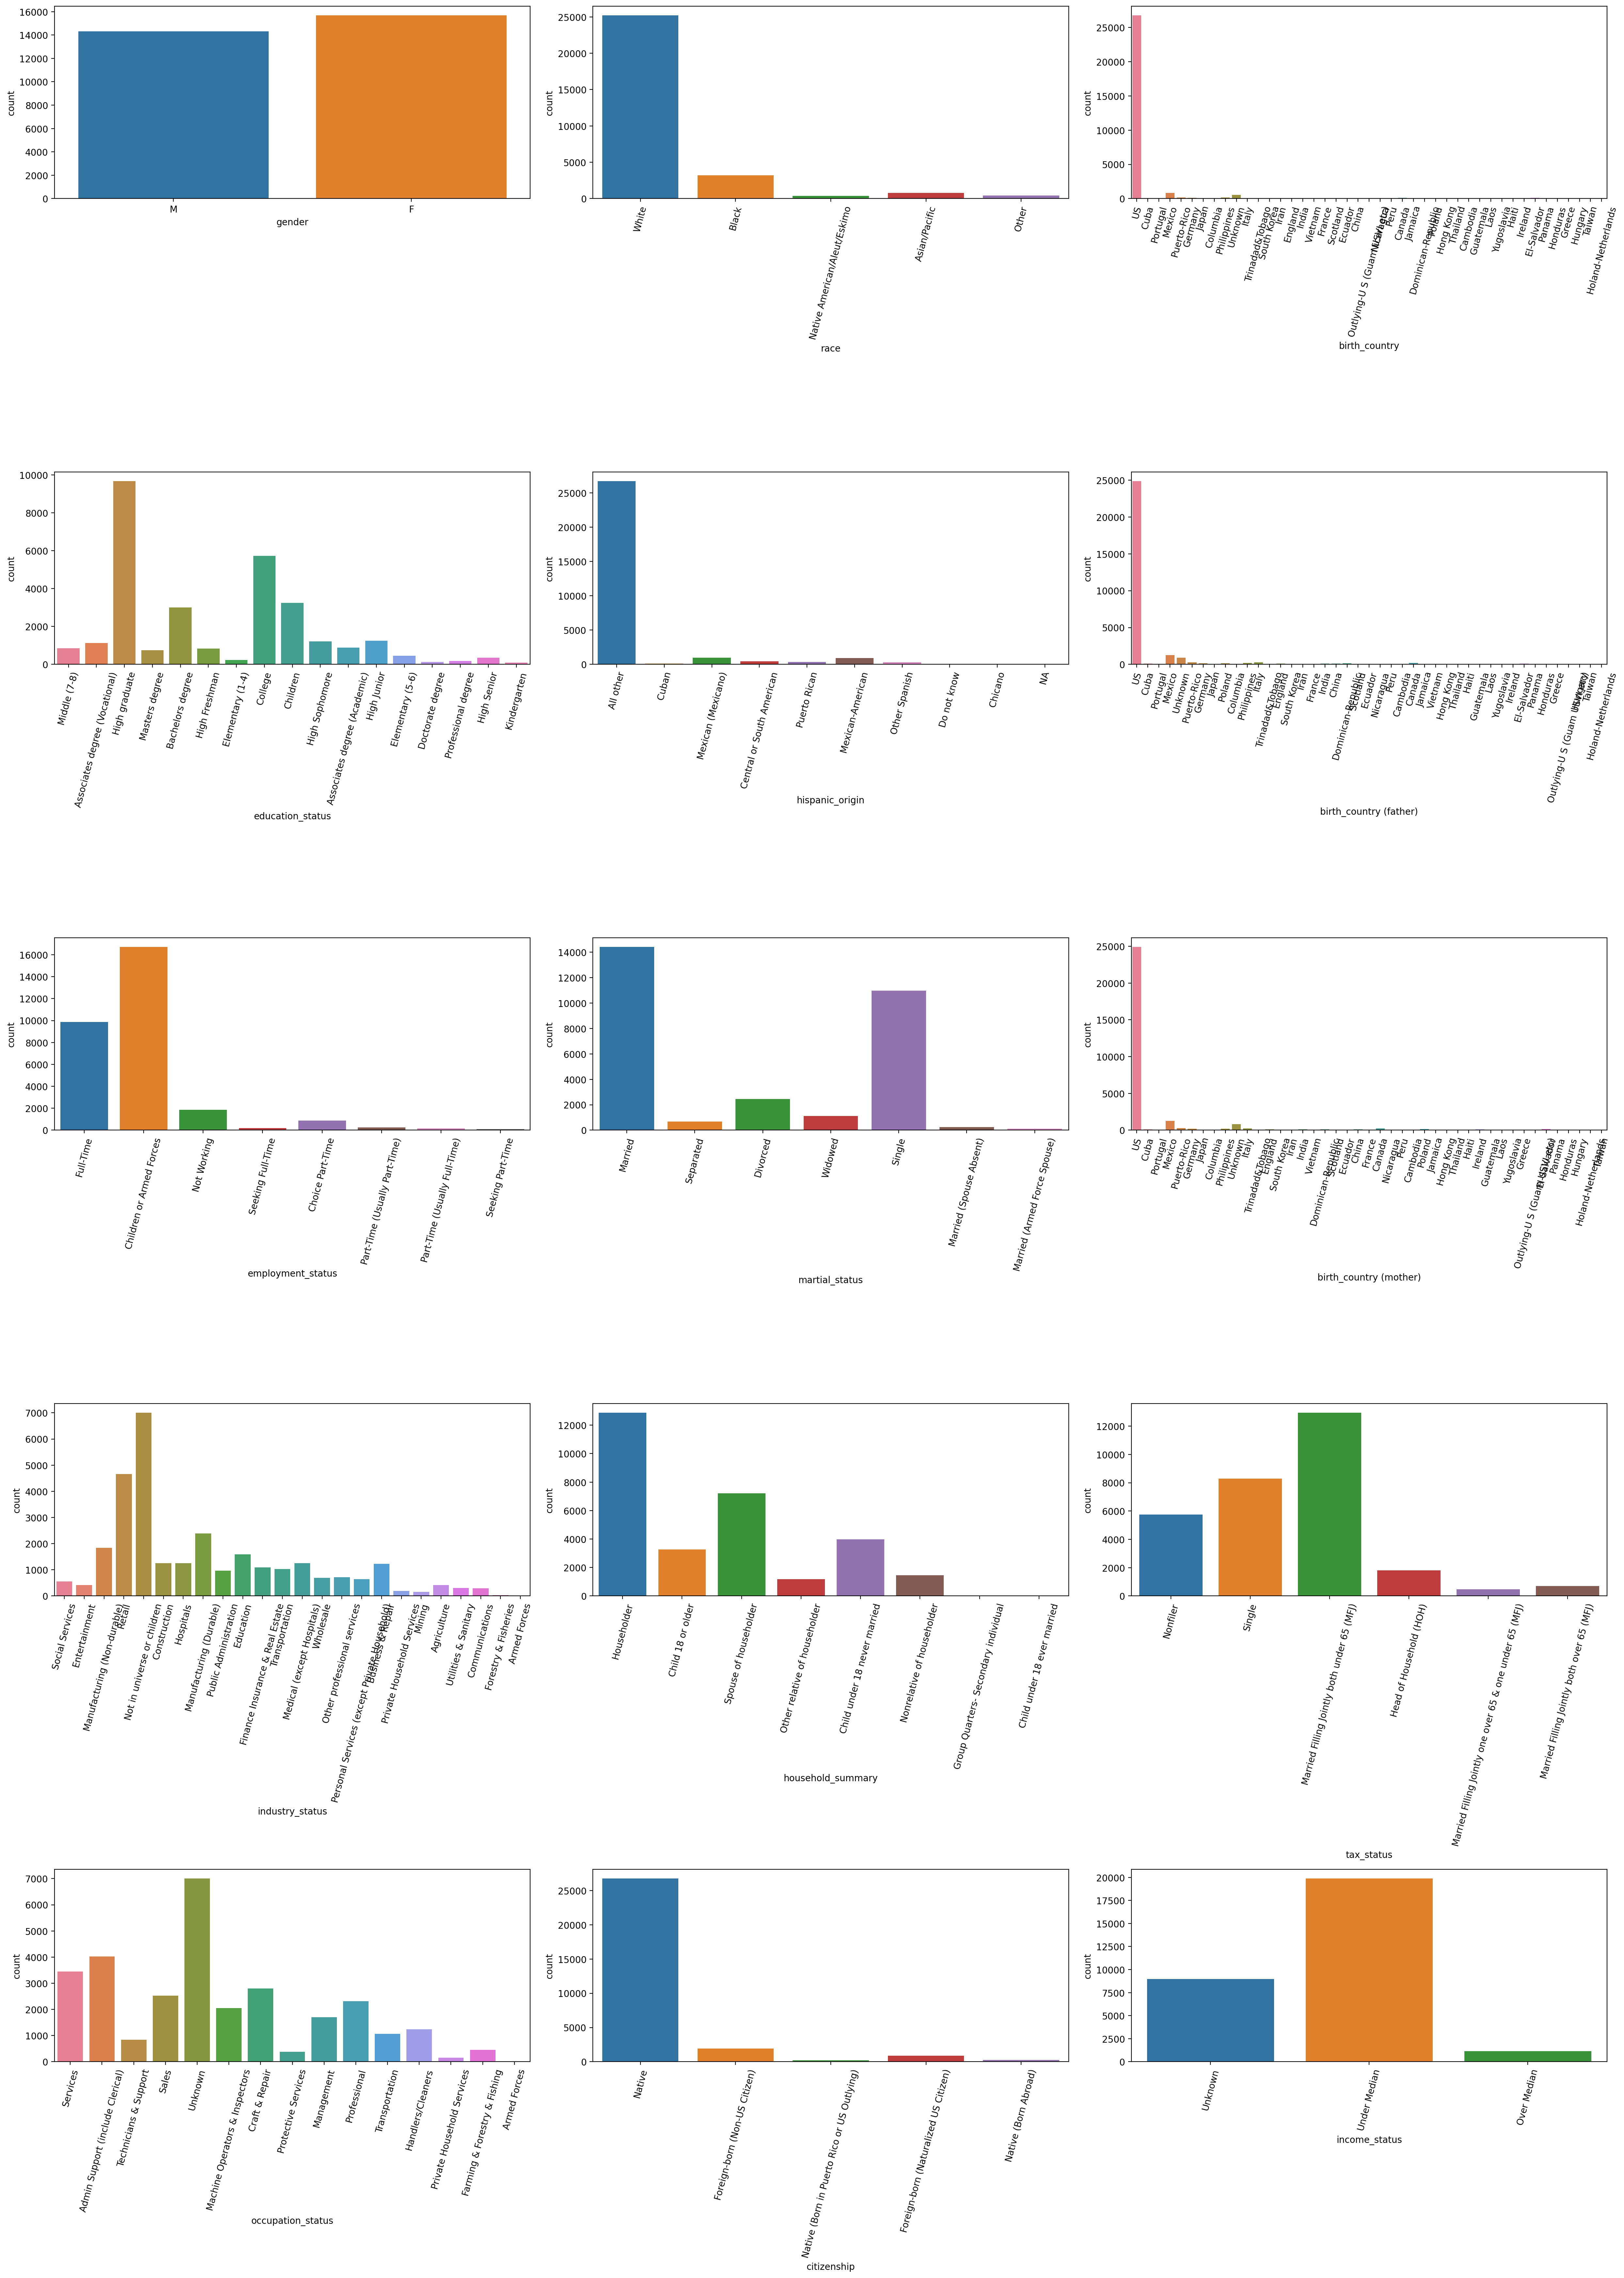

In [102]:
# 범주형 변수 countplot 그려봄
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(25, 35))

# flatten()을 통해axes를 1차원 array로 펴줘야 한다
axes = axes.T.flatten()

for col, ax in zip(cat_cols, axes):
    g = sns.countplot(data=total_df, x=col, ax=ax, hue=col)

    if total_df[col].nunique() > 2:
        g.set_xticklabels(g.get_xticklabels(), rotation=75)
    else:
        g.set_xticklabels(g.get_xticklabels())

fig.tight_layout()
plt.show()

#### 범주형 컬럼 값 치환
- `race`는 일단 두고 진행
- Binary 데이터로 변경
    - `birth_country`
        - US와 US가 아닌 것
    - `hispanic_origin`
        - Hispanic과 All other
    - `birth_country (father)`, `birth_country (mother)`
        - US와 US가 아닌 것
- Binary 아닌 것
    - `occupation_status`
        - unknown이 가장 많다
        - unknown 그대로 두면 결측치와 다를바가 없지 않을까? → 최대한 대체 시도
    - `education_status`
        - 6-2-4 제도인 것으로 보임  (https://namu.wiki/w/%EB%AF%B8%EA%B5%AD/%EA%B5%90%EC%9C%A1)
        - Elementary (1-4), Elementary (5-6) : Elementary (1-6)로 변경
        - High Freshman, High Sophomore, High Junior, High Senior : High (1-4)로 변경
        - Assiciates degree (Vocational), Assiciates degree (Academic) : Assiciates degree로 변경
    - `employment_status`
        - Seeking으로 시작하는 것들 : Not Working으로 변경
        - Children or Armed Forces : 다시 Children과 Armed Forces로 나눔 (나이 기준)
        - Choice Part-Time, Part-Time (Usually 어쩌구) : 전부 Part-Time으로 변경
    - `martial_status`
        - 미국 결혼 상태 보통 3가지로 나눔 (Married, Seperated, Never Married)
        - https://www.cdc.gov/nchs/hus/sources-definitions/marital-status.htm
        - Married (Spouse Absent), Married (Armed Force Spouse) : Married로 변경
        - Seperated, Divorced, Widowed : Seperated로 변경
    - `household_summary`
        - Child under 18 never married, Child under 18 ever married : Child under 18로 통일
        - Group Quarters- Secondary individual : Nonrelative of householder로 변경
    - `tax _status`
        - 각 항목들에 따라 세금 납부 정도가 다름 : 따로 건드리지 않음

##### `occupation_status`
- `unknown`이 가장 많다
    - `unknown` 그대로 두면 결측치와 다를바가 없지 않을까? → 최대한 대체 시도

In [103]:
# occupation_status : Unknown이 가장 많다
total_df.occupation_status.value_counts()

occupation_status
Unknown                             7004
Admin Support (include Clerical)    4025
Services                            3453
Craft & Repair                      2801
Sales                               2527
Professional                        2309
Machine Operators & Inspectors      2050
Management                          1707
Handlers/Cleaners                   1236
Transportation                      1061
Technicians & Support                838
Farming & Forestry & Fishing         452
Protective Services                  375
Private Household Services           160
Armed Forces                           2
Name: count, dtype: int64

In [104]:
# occupation_status Unknown인 것들만 모아서 확인
total_df[total_df.occupation_status=="Unknown"].head()

,id,age,gender,education_status,employment_status,working_week (yearly),industry_status,occupation_status,race,hispanic_origin,martial_status,household_summary,citizenship,birth_country,birth_country (father),birth_country (mother),tax_status,gains,losses,dividends,income_status,income
6,TRAIN_00006,67,M,Middle (7-8),Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,Divorced,Householder,Native,US,US,US,Nonfiler,0,0,0,Unknown,0.0
7,TRAIN_00007,64,M,Masters degree,Not Working,5,Not in universe or children,Unknown,White,All other,Married,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,2052,Under Median,0.0
11,TRAIN_00011,75,F,High Freshman,Children or Armed Forces,0,Not in universe or children,Unknown,White,Cuban,Married,Other relative of householder,Foreign-born (Non-US Citizen),Cuba,Cuba,Cuba,Nonfiler,0,0,0,Unknown,0.0
16,TRAIN_00016,10,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,Single,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Unknown,0.0
21,TRAIN_00021,16,F,High Freshman,Not Working,14,Not in universe or children,Unknown,White,All other,Single,Child under 18 never married,Native,US,US,US,Single,0,0,0,Under Median,0.0


In [105]:
# 전체 데이터에서  occupation_status Unknown인 사람의 비율
print("occupation_status가 Unknown인 사람의 비율 :", round(total_df[total_df.occupation_status=="Unknown"].shape[0] / total_df.shape[0], 2) * 100, "%")

occupation_status가 Unknown인 사람의 비율 : 23.0 %


In [106]:
# occupation_status가 Unknown인 경우 industry_status : 모두 Not in universe or children
total_df[total_df.occupation_status=="Unknown"]["industry_status"].value_counts()

industry_status
Not in universe or children    7004
Name: count, dtype: int64

In [107]:
# 반대로 industry_status가 Not in universe or children인 경우 occupation_status : 모두 Unknown
total_df[total_df.industry_status=="Not in universe or children"]["occupation_status"].value_counts()

occupation_status
Unknown    7004
Name: count, dtype: int64

In [108]:
# occupation_status가 Unknown인 것 중 age 다양함
total_df[total_df.occupation_status=="Unknown"]["age"].value_counts()

age
14    249
1     241
7     227
11    226
4     223
     ... 
49     20
55     20
87     18
88     15
89     13
Name: count, Length: 91, dtype: int64

In [109]:
# 미국 미성년자 기준 : 18세 미만
# 18세 미만 중 occupation_status가 Unknown인 것 확인
# 18세 미만인데  employment_status가 Children or Armed Forces
# - employment_status를 Children으로 바꿔도 될 듯
# - industry_status도 children으로 변경
# occupation_status이 Unknown이면 children으로 변경 (아니면 student로 변경?)

total_df[(total_df.age<18) & (total_df.occupation_status=="Unknown")].head()

,id,age,gender,education_status,employment_status,working_week (yearly),industry_status,occupation_status,race,hispanic_origin,martial_status,household_summary,citizenship,birth_country,birth_country (father),birth_country (mother),tax_status,gains,losses,dividends,income_status,income
16,TRAIN_00016,10,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,Single,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Unknown,0.0
21,TRAIN_00021,16,F,High Freshman,Not Working,14,Not in universe or children,Unknown,White,All other,Single,Child under 18 never married,Native,US,US,US,Single,0,0,0,Under Median,0.0
35,TRAIN_00035,16,F,High Freshman,Not Working,0,Not in universe or children,Unknown,White,Puerto Rican,Single,Child under 18 never married,Native,US,Puerto-Rico,Puerto-Rico,Nonfiler,0,0,0,Under Median,0.0
41,TRAIN_00041,7,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,Single,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Under Median,0.0
56,TRAIN_00056,17,F,High Freshman,Not Working,0,Not in universe or children,Unknown,White,All other,Single,Nonrelative of householder,Native,US,US,US,Nonfiler,0,0,0,Under Median,0.0


In [110]:
total_df[(total_df.age<18) & (total_df.occupation_status=="Unknown")].shape

(3661, 22)

In [111]:
total_df[(total_df.age<18) & (total_df.occupation_status=="Unknown")]["employment_status"].value_counts()

employment_status
Children or Armed Forces    3441
Not Working                  212
Seeking Part-Time              8
Name: count, dtype: int64

In [112]:
total_df[(total_df.age<18) & (total_df.occupation_status=="Unknown")]["industry_status"].value_counts()

industry_status
Not in universe or children    3661
Name: count, dtype: int64

In [113]:
total_df[(total_df.age<18) & (total_df.industry_status=="Not in universe or children")].shape

(3661, 22)

In [114]:
total_df[total_df.industry_status=="Not in universe or children"]

,id,age,gender,education_status,employment_status,working_week (yearly),industry_status,occupation_status,race,hispanic_origin,martial_status,household_summary,citizenship,birth_country,birth_country (father),birth_country (mother),tax_status,gains,losses,dividends,income_status,income
6,TRAIN_00006,67,M,Middle (7-8),Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,Divorced,Householder,Native,US,US,US,Nonfiler,0,0,0,Unknown,0.0
7,TRAIN_00007,64,M,Masters degree,Not Working,5,Not in universe or children,Unknown,White,All other,Married,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,2052,Under Median,0.0
11,TRAIN_00011,75,F,High Freshman,Children or Armed Forces,0,Not in universe or children,Unknown,White,Cuban,Married,Other relative of householder,Foreign-born (Non-US Citizen),Cuba,Cuba,Cuba,Nonfiler,0,0,0,Unknown,0.0
16,TRAIN_00016,10,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,Single,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Unknown,0.0
21,TRAIN_00021,16,F,High Freshman,Not Working,14,Not in universe or children,Unknown,White,All other,Single,Child under 18 never married,Native,US,US,US,Single,0,0,0,Under Median,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,TEST_9977,8,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,Single,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Unknown,NaN
9983,TEST_9983,12,F,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,Single,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Unknown,NaN
9989,TEST_9989,80,F,High graduate,Not Working,0,Not in universe or children,Unknown,White,All other,Widowed,Other relative of householder,Native,US,US,US,Nonfiler,0,0,0,Under Median,NaN
9991,TEST_9991,43,F,High graduate,Not Working,0,Not in universe or children,Unknown,Black,All other,Single,Householder,Native,US,US,US,Nonfiler,0,0,0,Unknown,NaN


In [115]:
# 18세 미만이지만 occupation_status가 Unknown이 아닌 사람들
total_df[(total_df.age<18) & (total_df.occupation_status!="Unknown")].head()

,id,age,gender,education_status,employment_status,working_week (yearly),industry_status,occupation_status,race,hispanic_origin,martial_status,household_summary,citizenship,birth_country,birth_country (father),birth_country (mother),tax_status,gains,losses,dividends,income_status,income
29,TRAIN_00029,15,F,Middle (7-8),Children or Armed Forces,12,Social Services,Services,White,All other,Single,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Under Median,0.0
38,TRAIN_00038,17,F,High Junior,Children or Armed Forces,52,Medical (except Hospitals),Services,White,All other,Single,Other relative of householder,Native,US,US,US,Single,0,0,0,Unknown,0.0
48,TRAIN_00048,17,M,High Freshman,Children or Armed Forces,26,Retail,Handlers/Cleaners,White,All other,Single,Child under 18 never married,Native,US,US,US,Single,0,0,0,Under Median,550.0
89,TRAIN_00089,15,F,High Freshman,Children or Armed Forces,6,Private Household Services,Private Household Services,White,All other,Single,Child under 18 never married,Native,US,US,Unknown,Nonfiler,0,0,0,Under Median,200.0
127,TRAIN_00127,16,F,High Sophomore,Children or Armed Forces,20,Private Household Services,Private Household Services,White,All other,Single,Child under 18 never married,Native,US,US,US,Nonfiler,0,0,0,Under Median,435.0


In [116]:
# 18세 이상 (성인)인데 occupation_status가 Unknown인 사람들 (2224먕)
total_df[(total_df.age>=18) & (total_df.occupation_status=="Unknown")].head()

,id,age,gender,education_status,employment_status,working_week (yearly),industry_status,occupation_status,race,hispanic_origin,martial_status,household_summary,citizenship,birth_country,birth_country (father),birth_country (mother),tax_status,gains,losses,dividends,income_status,income
6,TRAIN_00006,67,M,Middle (7-8),Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,Divorced,Householder,Native,US,US,US,Nonfiler,0,0,0,Unknown,0.0
7,TRAIN_00007,64,M,Masters degree,Not Working,5,Not in universe or children,Unknown,White,All other,Married,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,2052,Under Median,0.0
11,TRAIN_00011,75,F,High Freshman,Children or Armed Forces,0,Not in universe or children,Unknown,White,Cuban,Married,Other relative of householder,Foreign-born (Non-US Citizen),Cuba,Cuba,Cuba,Nonfiler,0,0,0,Unknown,0.0
22,TRAIN_00022,31,F,High Sophomore,Children or Armed Forces,0,Not in universe or children,Unknown,White,Puerto Rican,Married (Spouse Absent),Householder,Native (Born in Puerto Rico or US Outlying),Puerto-Rico,Puerto-Rico,Puerto-Rico,Nonfiler,0,0,0,Unknown,0.0
23,TRAIN_00023,76,M,High Sophomore,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,Married,Householder,Foreign-born (Naturalized US Citizen),Germany,Germany,Germany,Married Filling Jointly both over 65 (MFJ),0,0,0,Under Median,0.0


In [117]:
total_df[(total_df.age>=18) & (total_df.occupation_status=="Unknown") & (total_df.industry_status!="Not in universe or children")]

,id,age,gender,education_status,employment_status,working_week (yearly),industry_status,occupation_status,race,hispanic_origin,martial_status,household_summary,citizenship,birth_country,birth_country (father),birth_country (mother),tax_status,gains,losses,dividends,income_status,income


In [118]:
# 미국 군인 (준장 이하) 일반적으로 62세 정년
# 이 사람들 중 employment_status이 Children or Armed Forces	인 사람들은 어디에도 해당하지 않음
# employment_status → Not Working으로 변경
total_df[(total_df.age>=62) & (total_df.occupation_status=="Unknown")].head()

,id,age,gender,education_status,employment_status,working_week (yearly),industry_status,occupation_status,race,hispanic_origin,martial_status,household_summary,citizenship,birth_country,birth_country (father),birth_country (mother),tax_status,gains,losses,dividends,income_status,income
6,TRAIN_00006,67,M,Middle (7-8),Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,Divorced,Householder,Native,US,US,US,Nonfiler,0,0,0,Unknown,0.0
7,TRAIN_00007,64,M,Masters degree,Not Working,5,Not in universe or children,Unknown,White,All other,Married,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,2052,Under Median,0.0
11,TRAIN_00011,75,F,High Freshman,Children or Armed Forces,0,Not in universe or children,Unknown,White,Cuban,Married,Other relative of householder,Foreign-born (Non-US Citizen),Cuba,Cuba,Cuba,Nonfiler,0,0,0,Unknown,0.0
23,TRAIN_00023,76,M,High Sophomore,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,Married,Householder,Foreign-born (Naturalized US Citizen),Germany,Germany,Germany,Married Filling Jointly both over 65 (MFJ),0,0,0,Under Median,0.0
28,TRAIN_00028,63,M,Masters degree,Not Working,6,Not in universe or children,Unknown,White,All other,Married,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown,0.0


In [119]:
total_df.occupation_status.value_counts()

occupation_status
Unknown                             7004
Admin Support (include Clerical)    4025
Services                            3453
Craft & Repair                      2801
Sales                               2527
Professional                        2309
Machine Operators & Inspectors      2050
Management                          1707
Handlers/Cleaners                   1236
Transportation                      1061
Technicians & Support                838
Farming & Forestry & Fishing         452
Protective Services                  375
Private Household Services           160
Armed Forces                           2
Name: count, dtype: int64

In [120]:
total_df[total_df.occupation_status=="Armed Forces"]

,id,age,gender,education_status,employment_status,working_week (yearly),industry_status,occupation_status,race,hispanic_origin,martial_status,household_summary,citizenship,birth_country,birth_country (father),birth_country (mother),tax_status,gains,losses,dividends,income_status,income
10342,TRAIN_10342,31,F,College,Seeking Full-Time,20,Armed Forces,Armed Forces,White,Puerto Rican,Married,Spouse of householder,Native,US,Puerto-Rico,Puerto-Rico,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,0.0
8902,TEST_8902,24,M,High graduate,Seeking Full-Time,52,Armed Forces,Armed Forces,White,All other,Married,Spouse of householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,NaN


In [121]:
total_df.employment_status.value_counts()

employment_status
Children or Armed Forces         16708
Full-Time                         9857
Not Working                       1848
Choice Part-Time                   886
Part-Time (Usually Part-Time)      246
Seeking Full-Time                  180
Part-Time (Usually Full-Time)      162
Seeking Part-Time                  113
Name: count, dtype: int64

In [122]:
total_df.industry_status.value_counts()

industry_status
Not in universe or children                     7004
Retail                                          4655
Manufacturing (Durable)                         2390
Manufacturing (Non-durable)                     1836
Education                                       1585
Construction                                    1259
Medical (except Hospitals)                      1253
Hospitals                                       1252
Business & Repair                               1230
Finance Insurance & Real Estate                 1096
Transportation                                  1031
Public Administration                            966
Other professional services                      720
Wholesale                                        688
Personal Services (except Private Household)     647
Social Services                                  557
Entertainment                                    423
Agriculture                                      417
Utilities & Sanitary          

In [123]:
# 18세 이상 62세 미만인데 occupation_status가 Unknown
# - industry_status : 전부 Not in universe or children
# - income : 전부 0
# - working_week (yearly) : 0이 많긴해도 다양함
# employment_status가 Children or Armed Forces 인 사람들
# - employment_status, occupation_status : Not Working으로 변경

total_df[(total_df.age>=18) 
         & (total_df.age<62) 
         & (total_df.occupation_status=="Unknown")
         & (total_df.employment_status=="Children or Armed Forces")].head()

,id,age,gender,education_status,employment_status,working_week (yearly),industry_status,occupation_status,race,hispanic_origin,martial_status,household_summary,citizenship,birth_country,birth_country (father),birth_country (mother),tax_status,gains,losses,dividends,income_status,income
22,TRAIN_00022,31,F,High Sophomore,Children or Armed Forces,0,Not in universe or children,Unknown,White,Puerto Rican,Married (Spouse Absent),Householder,Native (Born in Puerto Rico or US Outlying),Puerto-Rico,Puerto-Rico,Puerto-Rico,Nonfiler,0,0,0,Unknown,0.0
39,TRAIN_00039,18,M,High Junior,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,Single,Child 18 or older,Native,US,US,US,Nonfiler,0,0,0,Under Median,0.0
55,TRAIN_00055,61,M,Middle (7-8),Children or Armed Forces,0,Not in universe or children,Unknown,Black,All other,Married,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,0.0
62,TRAIN_00062,61,F,High graduate,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,Married,Spouse of householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown,0.0
155,TRAIN_00155,23,M,High graduate,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,Single,Householder,Native,US,US,US,Single,0,0,0,Unknown,0.0


In [124]:
# 18세 이상 62세 미만, occupation_status가 Unknown이 아니고, employment_status가 children or armed forces
# → employment_status : Armed Forces로 변경
total_df[(total_df.age>=18) 
         & (total_df.age<62) 
         & (total_df.occupation_status!="Unknown")
         & (total_df.employment_status=="Children or Armed Forces")].head()

,id,age,gender,education_status,employment_status,working_week (yearly),industry_status,occupation_status,race,hispanic_origin,martial_status,household_summary,citizenship,birth_country,birth_country (father),birth_country (mother),tax_status,gains,losses,dividends,income_status,income
8,TRAIN_00008,24,F,Bachelors degree,Children or Armed Forces,52,Retail,Sales,White,All other,Single,Child 18 or older,Native,US,US,US,Single,0,0,0,Under Median,0.0
10,TRAIN_00010,56,F,High graduate,Children or Armed Forces,52,Hospitals,Services,Black,All other,Married,Spouse of householder,Native,US,US,US,Married Filling Jointly one over 65 & one unde...,0,0,0,Under Median,0.0
14,TRAIN_00014,44,M,High graduate,Children or Armed Forces,52,Public Administration,Protective Services,White,All other,Married,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,200,Over Median,0.0
17,TRAIN_00017,48,F,Bachelors degree,Children or Armed Forces,52,Finance Insurance & Real Estate,Management,White,All other,Divorced,Householder,Native,US,US,US,Single,0,0,0,Under Median,850.0
19,TRAIN_00019,29,F,College,Children or Armed Forces,52,Finance Insurance & Real Estate,Admin Support (include Clerical),White,All other,Married,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown,950.0


In [125]:
# occupation_status가 Unknown인 경우, income 또한 전부 0
total_df[total_df.occupation_status=="Unknown"]["income"].value_counts()

income
0.0    4688
Name: count, dtype: int64

In [126]:
total_df[total_df.occupation_status=="Armed Forces"]

,id,age,gender,education_status,employment_status,working_week (yearly),industry_status,occupation_status,race,hispanic_origin,martial_status,household_summary,citizenship,birth_country,birth_country (father),birth_country (mother),tax_status,gains,losses,dividends,income_status,income
10342,TRAIN_10342,31,F,College,Seeking Full-Time,20,Armed Forces,Armed Forces,White,Puerto Rican,Married,Spouse of householder,Native,US,Puerto-Rico,Puerto-Rico,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,0.0
8902,TEST_8902,24,M,High graduate,Seeking Full-Time,52,Armed Forces,Armed Forces,White,All other,Married,Spouse of householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,NaN


#### 수치형 컬럼

##### income_status
- Income의 경우 1시간 단위의 근로 소득을 의미하고, Income_Status의 경우 최종 소득을 바탕으로 구성되어 있다
- https://dacon.io/competitions/official/236230/talkboard/411247?page=1&dtype=recent

In [127]:
# Unknown 6026개 (많다)
total_df["income_status"].value_counts()

income_status
Under Median    19879
Unknown          8980
Over Median      1141
Name: count, dtype: int64

In [128]:
print("income_status 컬럼의 Unknown 비율 :", round((total_df["income_status"].value_counts()["Unknown"] / total_df.shape[0])*100, 2), "%")

income_status 컬럼의 Unknown 비율 : 29.93 %


In [129]:
# Unknown을 최대한 대체
# Under Median의 가장 높은 값 구해본다
# income 컬럼의 중위값 : 500

In [130]:
total_df[total_df.income_status=="Under Median"]["income"].value_counts()

income
0.0       5674
500.0      520
700.0      382
600.0      382
800.0      346
          ... 
534.0        1
2375.0       1
1602.0       1
1194.0       1
2050.0       1
Name: count, Length: 958, dtype: int64

In [131]:
total_df[total_df.income_status=="Over Median"]["income"].value_counts()

income
0.0       354
1800.0     18
2000.0     15
1500.0     14
2300.0     14
         ... 
1093.0      1
2291.0      1
2723.0      1
2680.0      1
2373.0      1
Name: count, Length: 183, dtype: int64

In [132]:
total_df[total_df.income_status=="Unknown"]["income"].value_counts()

income
0.0       2669
500.0      215
800.0      175
600.0      163
700.0      161
          ... 
2140.0       1
913.0        1
844.0        1
1155.0       1
999.0        1
Name: count, Length: 659, dtype: int64

In [133]:
# income_status가 Under Median으로 적힌 것 중 가장 큰 값 : 9916 (income 컬럼의 중위값인 500보다 크다)
np.max(total_df[total_df.income_status=="Under Median"]["income"])

9916.0

In [134]:
# income_status가 Over Median으로 적힌 것 중 가장 작은 값 : 0 (income 컬럼의 중위값인 500보다 작다)
np.min(total_df[total_df.income_status=="Over Median"]["income"])

0.0

In [135]:
total_df[total_df.income==9916]

,id,age,gender,education_status,employment_status,working_week (yearly),industry_status,occupation_status,race,hispanic_origin,martial_status,household_summary,citizenship,birth_country,birth_country (father),birth_country (mother),tax_status,gains,losses,dividends,income_status,income
4951,TRAIN_04951,40,F,Associates degree (Vocational),Children or Armed Forces,52,Education,Admin Support (include Clerical),White,Mexican (Mexicano),Married,Spouse of householder,Foreign-born (Naturalized US Citizen),Mexico,Mexico,Mexico,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,9916.0


In [136]:
total_df[(total_df.income_status=="Over Median") & (total_df.income==0)].shape

(354, 22)

In [137]:
total_df[(total_df.income<=9916) & (total_df.income_status=="Over Median")].shape


(736, 22)

In [138]:
total_df[(total_df.income>9916)]

,id,age,gender,education_status,employment_status,working_week (yearly),industry_status,occupation_status,race,hispanic_origin,martial_status,household_summary,citizenship,birth_country,birth_country (father),birth_country (mother),tax_status,gains,losses,dividends,income_status,income
2008,TRAIN_02008,46,M,Doctorate degree,Children or Armed Forces,52,Other professional services,Professional,White,All other,Single,Householder,Native,US,US,US,Single,0,0,0,Over Median,9999.0


##### 수치형 컬럼 의문점
- `income_status` 컬럼은 어떻게 처리해야 할까?
    - `Unknown`인 값들 처리
        - `employment_status`, `industry_status`, `occupation_status` 컬럼들에서는 최대한 `Unknown` 다른 값으로 대체
    - `Under Median`, `Over Median` 나누는 기준을 모르겠음
        - Under Median 중 가장 큰 값 : 9916 (income 컬럼의 중위값인 500보다 크다)
        - Over Median 중 9916보다 큰 값 : 1개 존재 (9999)
    - 0인 값들이 너무 많음
- `gains`, `losses`, `dividends` 컬럼 처리
    - 0인 값들이 너무 많음

## 범주형 컬럼 전처리 함수 생성

In [139]:
def modify_occupation_status(df):
    # occupation_status 변경
    # 미국 미성년자 기준 : 18세 미만
    # 18세 미만 중 occupation_status가 Unknown인 것 확인
    # 18세 미만인데  employment_status가 Children or Armed Forces
    # - employment_status를 Children으로 바꿔도 될 듯
    # - industry_status도 Children으로 변경
    # occupation_status이 Unknown이면 children으로 변경
    
    df.loc[(df.age<18) 
           & (df.occupation_status=="Unknown") 
           & (df.employment_status=="Children or Armed Forces"), 
           ["employment_status", "occupation_status"]] = ["Children",  "Children"]
    
    # 미국 군인 (준장 이하) 일반적으로 62세 정년
    # 이 사람들 중 employment_status이 Children or Armed Forces인 사람들은 어디에도 해당하지 않음
    # employment_status → Not Working으로 변경
    df.loc[(df.age>=62) 
           & (df.occupation_status=="Unknown") 
           & (df.employment_status=="Children or Armed Forces"),
           ["employment_status", "industry_status", "occupation_status"]] = ["Not Working", "Not in universe", "Not Working"]

    
    # 18세 이상 62세 미만인데 occupation_status가 Unknown
    # - industry_status : 전부 Not in universe or children
    # - income : 전부 0
    # - working_week (yearly) : 0이 많긴해도 다양함
    # employment_status가 Children or Armed Forces 인 사람들
    # - employment_status, occupation_status : Not Working 으로 변경

    df.loc[(df.age>=18) 
           & (df.age<62) 
           & (df.occupation_status=="Unknown") 
           & (df.employment_status=="Children or Armed Forces"), 
           ["employment_status", "industry_status", "occupation_status"]] = ["Not Working", "Not in universe", "Not Working"]
    
    # 18세 이상 62세 미만, occupation_status가 Unknown이 아니고, employment_status가 children or armed forces
    # → employment_status, industry_status, occupation_status : Armed Forces로 변경
    
    df.loc[(df.age>=18) 
           & (df.age<62) 
           & (df.occupation_status!="Unknown") 
           & (df.employment_status=="Children or Armed Forces"), 
           ["employment_status", "industry_status", "occupation_status"]] = ["Armed Forces", "Armed Forces", "Armed Forces"]

    
    # industry_status == "Not in universe or children" 인 사람 중, age<18이면 Children으로 변경
    # industry_status == "Not in universe or children" 인 사람 중, age>=18이면 Not in universe로 변경
    
    df.loc[(df.age<18) & (df.industry_status=="Not in universe or children"), "industry_status"] = "Children"
    df.loc[(df.age>=18) & (df.industry_status=="Not in universe or children"), "industry_status"] = "Not in universe"

    return df

In [140]:
def modify_cat_cols(df):
    # Binary 데이터로 변경
    df["birth_country"] = df["birth_country"].apply(lambda x: "Not US" if x != "US" else x)
    df["hispanic_origin"] = df["hispanic_origin"].apply(lambda x: "Hispanic" if x != " All other" else x)
    df["birth_country (father)"] = df["birth_country (father)"].apply(lambda x: "Not US" if x != "US" else x)
    df["birth_country (mother)"] = df["birth_country (mother)"].apply(lambda x: "Not US" if x != "US" else x)

    # education_status
    elementary = ["Elementary (1-4)", "Elementary (5-6)"]
    high = ["High Freshman", "High Sophomore", "High Junior", "High Senior"]
    associates = ["Associates degree (Vocational)", "Associates degree (Academic)"]

    df["education_status"] = df["education_status"].apply(lambda x: "Elementary (1-6)" if x in elementary else x)
    df["education_status"] = df["education_status"].apply(lambda x: "High (9-12)" if x in high else x)
    df["education_status"] = df["education_status"].apply(lambda x: "Associates degree" if x in associates else x)

    # employment_status
    df["employment_status"] = df["employment_status"].apply(lambda x: "Not Working" if x.startswith("Seeking") else x)
    df["employment_status"] = df["employment_status"].apply(lambda x: "Part-Time" if x.startswith(("Choice", "Part-Time")) else x)

    df.loc[(df.employment_status=="Children or Armed Forces") & (df.age<18), "employment_status"] = "Children"
    df.loc[(df.employment_status=="Children or Armed Forces") & (df.age>=18), "employment_status"] = "Armed Forces"
    
    # martial_status
    married_etc = ["Married (Spouse Absent)", "Married (Armed Force Spouse)"]
    separated_etc = ["Seperated", "Divorced", "Widowed"]

    df["martial_status"] = df["martial_status"].apply(lambda x: "Married" if x in married_etc else x)
    df["martial_status"] = df["martial_status"].apply(lambda x: "Separated" if x in separated_etc else x)

    # household_summary

    child_u18_etc = ["Child under 18 never married", "Child under 18 ever married"]
    df["household_summary"] = df["household_summary"].apply(lambda x: "Child under 18" if x in child_u18_etc else x)
    df.loc[(df.household_summary=="Group Quarters- Secondary individual"), "household_summary"] = "Nonrelative of householder"

    return df

In [141]:
df_mod = modify_occupation_status(total_df)
df_mod.head()

,id,age,gender,education_status,employment_status,working_week (yearly),industry_status,occupation_status,race,hispanic_origin,martial_status,household_summary,citizenship,birth_country,birth_country (father),birth_country (mother),tax_status,gains,losses,dividends,income_status,income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,Married,Householder,Native,US,US,US,Nonfiler,0,0,0,Unknown,425.0
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,Separated,Householder,Native,US,US,US,Single,0,0,0,Under Median,0.0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,Married,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860.0
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,Divorced,Householder,Native,US,US,US,Single,0,0,0,Under Median,850.0
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,Divorced,Householder,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570.0


In [142]:
df_mod = modify_cat_cols(df_mod)

In [143]:
# 전처리 완료한 파일 csv로 저장
df_mod.to_csv("data/preprocessed.csv", index=False)

## Cramer V 적용

In [144]:
def cramer_V(dataset):

    cramer_df = pd.DataFrame(columns = ["column 1", 
                                        "column 2", 
                                        "cramer V", 
                                        "Degrees of Freedom"])

    pass_columns = []
    
    for column_1 in dataset.columns:
        
        pass_columns.append(column_1)
        
        for column_2 in dataset.columns:
            
            if (column_1 == column_2) or (column_2 in pass_columns):

                pass

            else:
            
                cross_temp = np.array(pd.crosstab(dataset[column_1], dataset[column_2]))
                stat = stats.chi2_contingency(cross_temp)[0]
                obs_n = np.sum(cross_temp)
                phi = stat / obs_n
                r, k = cross_temp.shape
                df = min(r-1, k-1)
                cramer_V = np.sqrt(phi / df)
                
                temp_row = pd.DataFrame({"column 1" : [column_1], 
                                         "column 2" : [column_2], 
                                         "cramer V" : [cramer_V], 
                                         "Degrees of Freedom" : [df]})
                cramer_df = pd.concat([cramer_df, temp_row], ignore_index = True)

    cramer_df = cramer_df.sort_values(by = ["cramer V", "Degrees of Freedom"], ascending = False)
    
    return cramer_df

In [145]:
cramer = cramer_V(df_mod.select_dtypes(exclude=np.number).drop(columns=["id", "birth_country", "birth_country (father)", "birth_country (mother)"]))
cramer.head(30)

,column 1,column 2,cramer V,Degrees of Freedom
22,employment_status,occupation_status,0.821056,4
21,employment_status,industry_status,0.805345,4
58,martial_status,tax_status,0.725850,2
56,martial_status,household_summary,0.613600,2
30,industry_status,occupation_status,0.595124,16
11,education_status,employment_status,0.474391,4
53,hispanic_origin,citizenship,0.457909,1
26,employment_status,household_summary,0.440889,4
61,household_summary,tax_status,0.436222,5
28,employment_status,tax_status,0.419664,4


In [146]:
cramer_cols=["id", "birth_country", "birth_country (father)", "birth_country (mother)", "industry_status", "employment_status", "martial_status", "gains", "losses", "dividends"]

In [151]:
df_cramer = df_mod.drop(columns=cramer_cols).copy()
df_cramer.head(3)

,age,gender,education_status,working_week (yearly),occupation_status,race,hispanic_origin,household_summary,citizenship,tax_status,income_status,income
0,63,M,Middle (7-8),4,Services,White,All other,Householder,Native,Nonfiler,Unknown,425.0
1,37,M,Associates degree,52,Services,White,All other,Householder,Native,Single,Under Median,0.0
2,58,F,High graduate,52,Admin Support (include Clerical),Black,All other,Householder,Native,Married Filling Jointly both under 65 (MFJ),Under Median,860.0


In [153]:
cramer = cramer_V(df_cramer.select_dtypes(exclude=np.number))
cramer.head(30)

,column 1,column 2,cramer V,Degrees of Freedom
27,hispanic_origin,citizenship,0.457909,1
31,household_summary,tax_status,0.436222,5
4,gender,household_summary,0.404753,1
19,occupation_status,tax_status,0.392430,5
17,occupation_status,household_summary,0.386930,5
11,education_status,household_summary,0.385307,5
13,education_status,tax_status,0.343771,5
8,education_status,occupation_status,0.329466,11
1,gender,occupation_status,0.321458,1
10,education_status,hispanic_origin,0.313704,1


In [154]:
# 전처리 + cramer V 완료한 파일 csv로 저장
df_cramer.to_csv("data/cramer_preprocessed.csv", index=False)